In [14]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import dlib
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [15]:
# tf.__version__
import matplotlib.pyplot as plt

In [16]:
# model = load_model('EfficientNetb0epoch20batchsize50 (1).h5')
model = load_model('deepfake-detection-model.h5')

In [42]:
input_shape = (128, 128, 3)
pr_data = []
croped_images = []
detector = dlib.get_frontal_face_detector()
cap = cv2.VideoCapture('v1.mp4')
ret,frame = cap.read()


height, width, c = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video=cv2.VideoWriter('video1.avi', fourcc, 30,(width,height))


while cap.isOpened():
    ret, frame = cap.read()
    if ret != True:
        break
    if frameId % ((int(frameRate)+1)*1) == 0:
        face_rects, scores, idx = detector.run(frame, 0)
        for i, d in enumerate(face_rects):
            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()
            crop_img = frame[y1:y2, x1:x2]
            if(len(crop_img)==0):
                continue
            croped_images.append(crop_img)
            data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
            data = data.reshape(-1, 128, 128, 3)
            pr_data.append(int(model.predict_classes(data)))
            if (int(model.predict_classes(data))==0):
                txt="Fake"
                clr=(0,0,255)
            else:
                txt="Real"
                clr=(0,255,0)
                
            
            cv2.rectangle(frame, (x1-30,y1-100), (x2,y2), clr, 2)
            cv2.putText(img=frame, text=txt, org=(x1-30, y1-110),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2,
                color=clr,thickness=2,lineType= cv2.LINE_AA) 
         
        
            video.write(frame) 

                
cam.release() 
cv2.destroyAllWindows() 
print(list(pr_data))
print(len(pr_data))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

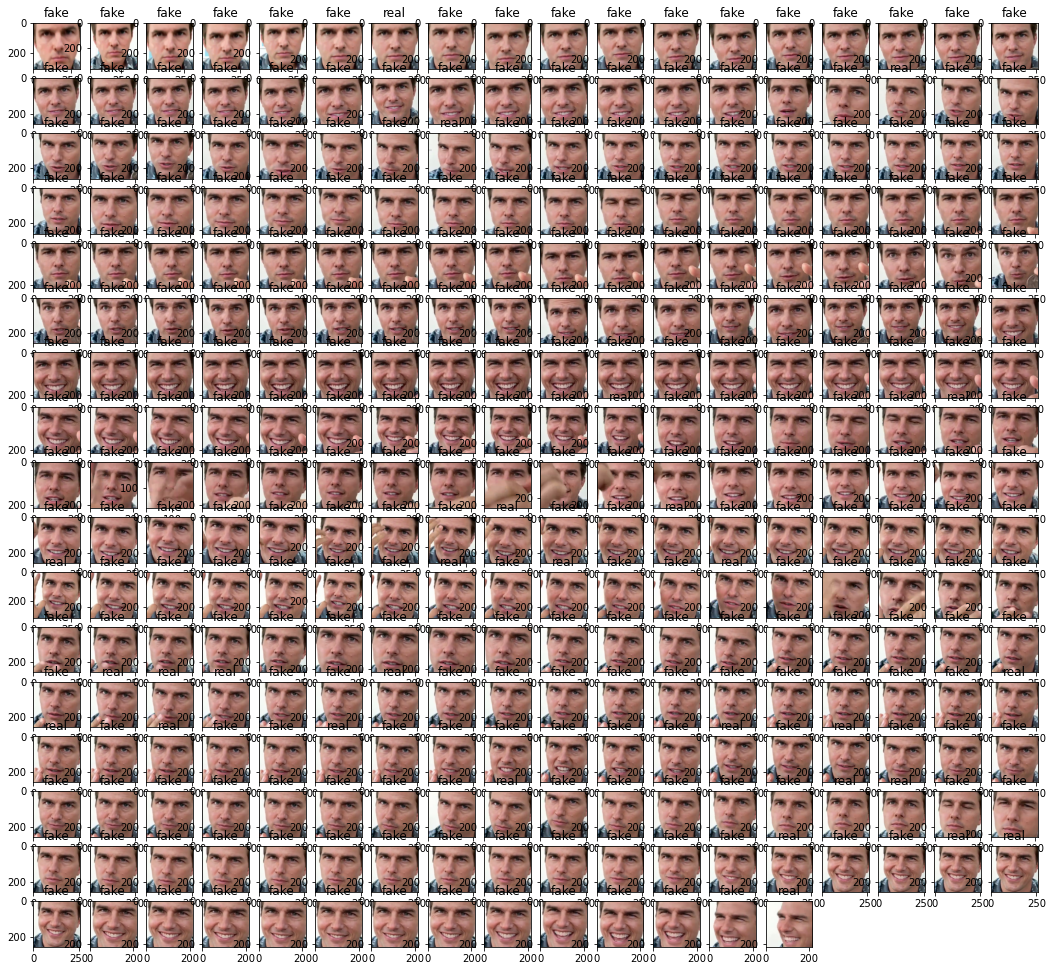

In [18]:
import math as m
axes=[]
fig=plt.figure(figsize=(18,18))
r=np.sqrt(len(croped_images))+1
c = m.ceil(len(croped_images)/r)+1
for i in range(0, len(croped_images)):
    axes.append(fig.add_subplot(r, c, i+1))
    if pr_data[i]==0:
        t="fake"
    else:
        t="real"
    plt.title(t)
    img = cv2.cvtColor(croped_images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img, aspect='auto')
    video.write(frame)
plt.show()
    


In [19]:
print("Number of extracted frames:", len(pr_data))
print("Probability that video is from real class:",np.mean(pr_data))

Number of extracted frames: 302
Probability that video is from real class: 0.09271523178807947


In [7]:
import pandas as pd

df = pd.read_csv("sample_submission.csv")

In [11]:
print(df.label[df.filename=='aassnaulhq.mp4'])

0    0
Name: label, dtype: int64


In [31]:
df.iloc[182]

filename    lpkgabskbw.mp4
label                    0
Name: 182, dtype: object

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
model

In [122]:


for i in os.listdir(): 
    img = cv2.imread(i)
    data = img_to_array(cv2.resize(img, (128, 128))).flatten() / 255.0
    print(model.predict(data))


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [103]:
print(os.listdir())

['1frame 0 sec.jpg', '1frame 10 sec.jpg', '1frame 12 sec.jpg', '1frame 14 sec.jpg', '1frame 16 sec.jpg', '1frame 18 sec.jpg', '1frame 20 sec.jpg', '1frame 4 sec.jpg', '1frame 6 sec.jpg', '1frame 8 sec.jpg']


In [115]:
os.chdir('..')